## Libraries

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import keras
import tensorflow as tf
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation,GlobalAveragePooling2D,Concatenate ,AveragePooling2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
# from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras import models, layers, regularizers
import keras as keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Input, Dropout, concatenate
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
import keras as keras
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Activation, Concatenate, Lambda
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras import regularizers, activations
import os
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline
from keras.models import Model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation,GlobalAveragePooling2D,Concatenate,Lambda
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Input, GlobalAveragePooling2D

In [ ]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 2080 Ti (UUID: GPU-f2f15110-8713-3371-414f-21e6c693f641)
GPU 1: NVIDIA GeForce RTX 2080 Ti (UUID: GPU-ab7ed36d-8dc7-8e92-4f77-8333691f7112)


In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

2 Physical GPUs, 1 Logical GPU


In [ ]:
#Checking available GPUs
import tensorflow as tf
gpus = tf.config.list_physical_devices()
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  # Disable all GPUS
  tf.config.set_visible_devices([1], 'GPU')
  visible_devices = tf.config.get_visible_devices()
  for device in visible_devices:
    assert device.device_type != 'GPU'
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

visible_devices

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

2 Physical GPUs, 1 Logical GPU


In [ ]:
config =  tf.config.set_visible_devices([], {'GPU': 1})
print(visible_devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


#Load Data

In [ ]:
## load data
from numpy import load

tr_d = load('D:/SaraYounas/Dataset/Data-1/Data-1.npy')
tr_l = load('D:/SaraYounas/Dataset/Data-1/DataLabels-1.npy')
print("Loaded Successfully")

Loaded Successfully


In [ ]:
#Confirming Shape
Images = tr_d
Labels = tr_l
print(Images.shape)
print(Labels.shape)

(17522, 224, 224, 3)
(17522,)


In [ ]:
## load data
from numpy import load

test_d = load('D:/SaraYounas/Dataset/Data-2/Data-2.npy')
test_l = load('D:/SaraYounas/Dataset/Data-2/DataLabels-2.npy')
print("Loaded Successfully")

Loaded Successfully


In [ ]:
#Confirming Shape
Images = test_d
Labels = test_l
print(Images.shape)
print(Labels.shape)

(7650, 224, 224, 3)
(7650,)


In [ ]:
X_data = np.concatenate([test_d,tr_d])
X_labels = np.concatenate([test_l,tr_l])

In [ ]:
#Confirming Shape
Images = X_data
Labels = X_labels
print(Images.shape)
print(Labels.shape)

(25172, 224, 224, 3)
(25172,)


# Dividing data using Train Test Split

In [ ]:
X_Train,X_test,Y_Train,Y_test=train_test_split(Images,Labels,test_size=0.2,random_state = 3, shuffle=True)

print("x train=",X_Train.shape)
print("y train=",Y_Train.shape)

print("x test=",X_test.shape)
print("y test=",Y_test.shape)

x train= (20137, 224, 224, 3)
y train= (20137,)
x test= (5035, 224, 224, 3)
y test= (5035,)


In [ ]:
X_train,X_Val,Y_train,Y_Val=train_test_split(X_Train,Y_Train,test_size=0.1,random_state = 3, shuffle=True)

print("x train=",X_train.shape)
print("y train=",Y_train.shape)

print("x valid=",X_Val.shape)
print("y valid=",Y_Val.shape)

x train= (18123, 224, 224, 3)
y train= (18123,)
x valid= (2014, 224, 224, 3)
y valid= (2014,)


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        #layers.Resizing(image_size, image_size),
        # layers.RandomFlip("horizontal"),
        # layers.RandomRotation(factor=0.02),
        # layers.RandomZoom(
        #     height_factor=0.2, width_factor=0.2

    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(X_train)
data_augmentation.layers[0].adapt(X_Val)

In [ ]:
nClasses=8
shape_x = 224
shape_y = 224
# scale=0.15
batch_size =32
epochs = 500

## Model Architecture






In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K



def repeat_elem(tensor, rep):
    # lambda function to repeat Repeats the elements of a tensor along an axis
    #by a factor of rep.
    # If tensor has shape (None, 256,256,3), lambda will return a tensor of shape
    #(None, 256,256,6), if specified axis=3 and rep=2.

     return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)




def gating_signal(input, out_size, batch_norm=False):
    """
    resize the down layer feature map into the same dimension as the up layer feature map
    using 1x1 conv
    :return: the gating feature map with the same dimension of the up layer feature map
    """
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

# Getting the x signal to the same shape as the gating signal
    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(1, 1), padding='same')(x)  # 16
    shape_theta_x = K.int_shape(theta_x)

# Getting the gating signal to the same number of filters as the inter_shape
    phi_g = layers.Conv2D(inter_shape, (1, 1),  padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3),
                                 strides=(1,1),
                                 padding='same')(phi_g)  # 16

    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32

    upsample_psi = repeat_elem(upsample_psi, shape_x[3])

    y = layers.multiply([upsample_psi, x])

    result = layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = layers.BatchNormalization()(result)
    return result_bn


In [ ]:
## AIR-CNN
def IncresModel(name='air-cnn'):


  #Convolutoinal Layers
  # input_img = Input(shape=img_input)

  img_input = Input(shape=(shape_x, shape_y, 3))
  x = Conv2D(8,(3,3), strides=(2,2),padding='same',data_format='channels_last',use_bias=False,name='conv_input')(img_input)
  x = MaxPooling2D((2,2),strides=(2,2),padding='same',name='max_input')(x)





  #inception block A-1

  # tower 1
  layer_1 = Conv2D(8, (1,1), strides=(1,1), padding='same', activation='LeakyReLU', name='conv_A1')(x)
  layer_1 = Conv2D(16, (3,3), strides=(1,1), padding='same',  activation='LeakyReLU',name='conv_A1_1')(layer_1)
  layer_1 = Conv2D(16, (3,3), strides=(1,1), padding='same', activation='LeakyReLU',name='conv_A1_11')(layer_1)


  # tower 2
  layer_2 = Conv2D(8, (1,1), strides=(1,1), padding='same', activation='LeakyReLU',name='conv_A1_2')(x)
  layer_2 = Conv2D(16, (3,3), strides=(1,1), padding='same', activation='LeakyReLU',name='conv_A1_22')(layer_2)

  # tower 4
  layer_3 = Conv2D(16, (1,1), strides=(1,1),padding='same', activation='LeakyReLU',name='conv_A1_3')(x)

  inep_block_A1 = concatenate([layer_1,layer_2,layer_3], axis = 3)

   ###############################################################################################
  inep_block_A1 = concatenate([inep_block_A1,x], axis = 3)

   #inception block A-2

  # tower 1
  layer_1 = Conv2D(8, (1,1), strides=(1,1),  padding='same', activation='LeakyReLU',name='conv_A2')(inep_block_A1)
  layer_1 = Conv2D(16, (3,3), strides=(1,1), padding='same',  activation='LeakyReLU', name='conv_A2_1')(layer_1)
  layer_1 = Conv2D(16, (3,3), strides=(1,1), padding='same', activation='LeakyReLU' , name='conv_A2_11')(layer_1)


  # tower 2
  layer_2 = Conv2D(8, (1,1), strides=(1,1), padding='same', activation='LeakyReLU', name='conv_A2_2')(inep_block_A1)
  layer_2 = Conv2D(16, (3,3), strides=(1,1), padding='same', activation='LeakyReLU' , name='conv_A2_22')(layer_2)


  # tower 4
  layer_3 = Conv2D(16, (1,1), strides=(1,1),padding='same', activation='LeakyReLU' , name='conv_A2_3')(inep_block_A1)


  inep_block_A2 = concatenate([layer_1,layer_2,layer_3], axis = 3)

   ###############################################################################################
  inep_block_A2 = concatenate([inep_block_A1,inep_block_A2], axis = 3)

   #inception block A-3

  # tower 1
  layer_1 = Conv2D(16, (1,1), strides=(1,1),  padding='same', activation='LeakyReLU',name='conv_A3')(inep_block_A2)
  layer_1 = Conv2D(32, (3,3), strides=(1,1), padding='same',  activation='LeakyReLU',name='conv_A3_1')(layer_1)
  layer_1 = Conv2D(32, (3,3), strides=(1,1),  padding='same', activation='LeakyReLU',name='conv_A3_11')(layer_1)


  # tower 2
  layer_2 = Conv2D(16, (1,1), strides=(1,1), padding='same', activation='LeakyReLU',name='conv_A3_2')(inep_block_A2)
  layer_2 = Conv2D(32, (3,3), strides=(1,1), padding='same', activation='LeakyReLU',name='conv_A3_22')(layer_2)


  # tower 4
  layer_3 = Conv2D(32, (1,1), strides=(1,1),padding='same', activation='LeakyReLU',name='conv_A3_3')(inep_block_A2)


  inep_block_A3 = concatenate([layer_1,layer_2,layer_3], axis = 3)

   ###############################################################################################
  inep_block_A3 = concatenate([inep_block_A3,inep_block_A2], axis = 3)

  FILTER_NUM = 16
  batch_norm = False
  gating_16 = gating_signal(inep_block_A3, 8*FILTER_NUM, batch_norm)
  att_16 = attention_block(inep_block_A3, gating_16, 8*FILTER_NUM)

  #inception block A-4

  # tower 1
  layer_1 = Conv2D(16, (1,1), strides=(1,1),  padding='same', activation='LeakyReLU',name='conv_A4')(att_16)
  layer_1 = Conv2D(32, (3,3), strides=(1,1), padding='same',  activation='LeakyReLU',name='conv_A4_1')(layer_1)
  layer_1 = Conv2D(32, (3,3), strides=(1,1),  padding='same', activation='LeakyReLU',name='conv_A4_11')(layer_1)


  # tower 2
  layer_2 = Conv2D(16, (1,1), strides=(1,1), padding='same', activation='LeakyReLU',name='conv_A4_2')(att_16)
  layer_2 = Conv2D(32, (3,3), strides=(1,1),padding='same', activation='LeakyReLU',name='conv_A4_22')(layer_2)


  # tower 4
  layer_3 = Conv2D(32, (1,1), strides=(1,1),padding='same', activation='LeakyReLU',name='conv_A4_3')(att_16)


  inep_block_A4 = concatenate([layer_1,layer_2,layer_3], axis = 3)

   ###############################################################################################
#   layer_3 = Conv2D(32, (1,1), strides=(2,2),padding='same', activation='LeakyReLU',name='incep-v3')(inep_block_A3)

  inep_block_A4 = concatenate([att_16,inep_block_A4], axis = 3)


  #inception block A-5

  # tower 1
  layer_1 = Conv2D(32, (1,1), strides=(1,1),  padding='same', activation='LeakyReLU',name='conv_A5')(inep_block_A4)
  layer_1 = Conv2D(64, (3,3), strides=(1,1), padding='same',  activation='LeakyReLU',name='conv_A5_1')(layer_1)
  layer_1 = Conv2D(64, (3,3),strides=(1,1), padding='same', activation='LeakyReLU',name='conv_A5_11')(layer_1)


  # tower 2
  layer_2 = Conv2D(32, (1,1), strides=(1,1), padding='same', activation='LeakyReLU',name='conv_A5_2')(inep_block_A4)
  layer_2 = Conv2D(64, (3,3), strides=(1,1), padding='same', activation='LeakyReLU',name='conv_A5_22')(layer_2)


  # tower 4
  layer_3 = Conv2D(32, (1,1), strides=(1,1),padding='same', activation='LeakyReLU',name='conv_A5_3')(inep_block_A4)


  inep_block_A5 = concatenate([layer_1,layer_2,layer_3], axis = 3)

   ###############################################################################################
  inep_block_A5 = concatenate([inep_block_A5,inep_block_A4], axis = 3)

  #inception block A-6

  # tower 1
  layer_1 = Conv2D(32, (1,1), strides=(1,1),  padding='same', activation='LeakyReLU',name='conv_A6')(inep_block_A5)
  layer_1 = Conv2D(64, (3,3), strides=(1,1), padding='same',  activation='LeakyReLU',name='conv_A6_1')(layer_1)
  layer_1 = Conv2D(64, (3,3), strides=(1,1), padding='same', activation='LeakyReLU',name='conv_A6_11')(layer_1)


  # tower 2
  layer_2 = Conv2D(32, (1,1), strides=(1,1), padding='same', activation='LeakyReLU',name='conv_A6_2')(inep_block_A5)
  layer_2 = Conv2D(64, (3,3), strides=(1,1),padding='same', activation='LeakyReLU',name='conv_A6_22')(layer_2)


  # tower 4
  layer_3 = Conv2D(64, (1,1), strides=(1,1),padding='same', activation='LeakyReLU',name='conv_A6_3')(inep_block_A5)


  inep_block_A6 = concatenate([layer_1,layer_2,layer_3], axis = 3)

   ###############################################################################################
  inep_block_A6 = concatenate([inep_block_A5,inep_block_A6], axis = 3)





  #inception block A-7

  # tower 1
  layer_1 = Conv2D(32, (1,1), strides=(1,1),  padding='same', activation='LeakyReLU',name='conv_A7')(inep_block_A6)
  layer_1 = Conv2D(64, (3,3), strides=(1,1), padding='same',  activation='LeakyReLU',name='conv_A7_1')(layer_1)
  layer_1 = Conv2D(64, (3,3), strides=(1,1), padding='same', activation='LeakyReLU',name='conv_A7_11')(layer_1)


  # tower 2
  layer_2 = Conv2D(32, (1,1), strides=(1,1), padding='same', activation='LeakyReLU',name='conv_A7_2')(inep_block_A6)
  layer_2 = Conv2D(64, (3,3), strides=(1,1),padding='same', activation='LeakyReLU',name='conv_A7_22')(layer_2)


  # tower 4
  layer_3 = Conv2D(64, (1,1), strides=(1,1),padding='same', activation='LeakyReLU',name='conv_A7_3')(inep_block_A6)


  inep_block_A7 = concatenate([layer_1,layer_2,layer_3], axis = 3)

   ###############################################################################################
  inep_block_A7 = concatenate([inep_block_A7,inep_block_A6], axis = 3)









  X = GlobalAveragePooling2D(name = 'GAPL')(inep_block_A7)



  dense_1 = Dropout(0.5)(X)
  dense_2 = Dense(256, activation='relu')(dense_1)

  #dense_3 = Dense(150, activation='relu')(dense_2)
  output = Dense(nClasses, activation='softmax')(dense_2)

  model = Model([img_input] , output)
  return model


In [ ]:
#Input Layer

model = IncresModel(name='air-cnn')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv_input (Conv2D)             (None, 112, 112, 8)  216         input_1[0][0]                    
__________________________________________________________________________________________________
max_input (MaxPooling2D)        (None, 56, 56, 8)    0           conv_input[0][0]                 
__________________________________________________________________________________________________
conv_A1 (Conv2D)                (None, 56, 56, 8)    72          max_input[0][0]                  
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file="model.png")

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## Compile Model

In [ ]:
##compile the model.
import tensorflow
learning_rate = 0.0001
optimizer = tensorflow.keras.optimizers.Adam(learning_rate)
model.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")


## Start Training Model

In [ ]:
checkpoint_path = 'D:/SaraYounas/SavedModels'
callbacks = []
callbacks.append(ModelCheckpoint(checkpoint_path + '/AIR-CNN-model.h5'))

In [ ]:
model_train = model.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs ,
                        callbacks=[callbacks],
                        verbose=1,
                        validation_data=(X_Val, Y_Val))

Epoch 1/500
567/567 [==============================] - 178s 293ms/step - loss: 1.7994 - accuracy: 0.3157 - val_loss: 1.8215 - val_accuracy: 0.3044


C:\Users\HP8\anaconda3\envs\tf_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/500
567/567 [==============================] - 146s 258ms/step - loss: 1.5441 - accuracy: 0.4023 - val_loss: 1.8116 - val_accuracy: 0.3242
Epoch 3/500
567/567 [==============================] - 127s 224ms/step - loss: 1.4623 - accuracy: 0.4319 - val_loss: 1.9218 - val_accuracy: 0.2895
Epoch 4/500
567/567 [==============================] - 121s 213ms/step - loss: 1.4020 - accuracy: 0.4515 - val_loss: 1.4740 - val_accuracy: 0.4101
Epoch 5/500
567/567 [==============================] - 119s 210ms/step - loss: 1.3635 - accuracy: 0.4668 - val_loss: 1.3538 - val_accuracy: 0.4657
Epoch 6/500
567/567 [==============================] - 119s 210ms/step - loss: 1.3347 - accuracy: 0.4801 - val_loss: 1.3845 - val_accuracy: 0.4598
Epoch 7/500
567/567 [==============================] - 119s 209ms/step - loss: 1.2960 - accuracy: 0.4910 - val_loss: 1.6861 - val_accuracy: 0.3952
Epoch 8/500
567/567 [==============================] - 117s 207ms/step - loss: 1.2746 - accuracy: 0.5051 - val_loss: 1

## Test model

In [ ]:
##load the saved model
from tensorflow.keras import models
saved_models=model.load_weights('D:/SaraYounas/SavedModels/AIR-CNN-model.h5')


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        #layers.Resizing(image_size, image_size),
        # layers.RandomFlip("horizontal"),
        # layers.RandomRotation(factor=0.02),
        # layers.RandomZoom(
        #     height_factor=0.2, width_factor=0.2

    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(X_test)


## Evaluate Model On Test Data

In [ ]:
## test loss and accuracy
test_eval = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.33908721804618835
Test accuracy: 0.916385293006897


In [ ]:
# test accuracy
pred=model.predict(X_test)
y_pred=np.argmax(pred,axis=1)

loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
print("\nEvaluation on test data: ", acc * 100)


Evaluation on test data:  91.6385293006897


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title     A   = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

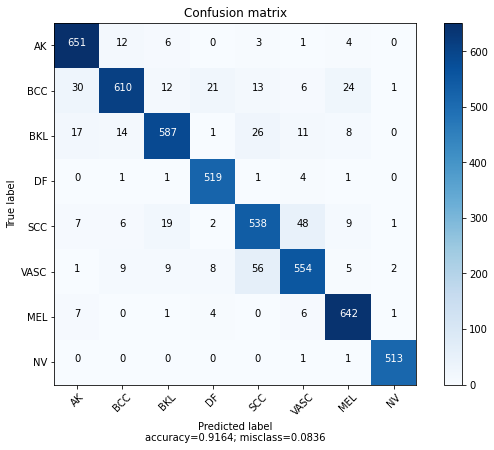

In [ ]:
confusion_mtx = confusion_matrix(Y_test, y_pred)
cm_plot_labels = ['AK', 'BCC' ,'BKL', 'DF', 'SCC' ,'VASC' ,'MEL', 'NV']
cm = plot_confusion_matrix(confusion_mtx, target_names = cm_plot_labels, normalize=False)

In [ ]:
from tensorflow.math import confusion_matrix
from sklearn.metrics import accuracy_score

#actual =  valid_data.labels
preds = np.argmax(model.predict(X_test), axis=1)
cfmx = confusion_matrix(Y_test, preds)
acc = accuracy_score(Y_test,preds)
print ('Test Accuracy:', acc )
print('Confusion matrix:', cfmx)

Test Accuracy: 0.9163853028798411
Confusion matrix: tf.Tensor(
[[651  12   6   0   3   1   4   0]
 [ 30 610  12  21  13   6  24   1]
 [ 17  14 587   1  26  11   8   0]
 [  0   1   1 519   1   4   1   0]
 [  7   6  19   2 538  48   9   1]
 [  1   9   9   8  56 554   5   2]
 [  7   0   1   4   0   6 642   1]
 [  0   0   0   0   0   1   1 513]], shape=(8, 8), dtype=int32)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       677
           1       0.94      0.85      0.89       717
           2       0.92      0.88      0.90       664
           3       0.94      0.98      0.96       527
           4       0.84      0.85      0.85       630
           5       0.88      0.86      0.87       644
           6       0.93      0.97      0.95       661
           7       0.99      1.00      0.99       515

    accuracy                           0.92      5035
   macro avg       0.92      0.92      0.92      5035
weighted avg       0.92      0.92      0.92      5035



In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision = precision_score(Y_test, y_pred, average='weighted')
print('Precision: %.3f' % precision)
recall = recall_score(Y_test, y_pred, average='weighted')
print('Recall: %.3f' % recall)
score = f1_score(Y_test, y_pred, average='weighted')
print('F-Measure: %.3f' % score)

Precision: 0.916
Recall: 0.916
F-Measure: 0.916
